In [1]:
# Loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score, plot_roc_curve
from tqdm import tqdm

%matplotlib inline

In [2]:
# let's import the vst-transformed count matrix (rows = samples, col = genes; last col = label)
lusc_data = pd.read_csv("./datasets/LUSC_geneReadCount_VST.csv")

In [3]:
lusc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551 entries, TCGA-94-7943-01A-11R-2187-07 to TCGA-51-4079-01A-01R-1100-07
Columns: 39753 entries, ENSG00000000003 to label
dtypes: float64(39752), object(1)
memory usage: 167.1+ MB


In [4]:
lusc_data.describe()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281849,ENSG00000281852,ENSG00000281880,ENSG00000281883,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281912,ENSG00000281920
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,...,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,11.506768,3.210376,11.134674,9.733453,9.366600,9.736418,11.722034,11.641264,12.855367,11.043012,...,4.041995,4.042448,3.120010,3.606434,5.596421,4.555536,2.958657,3.082710,6.137523,4.073239
std,0.787590,0.489220,0.571272,0.434617,0.852139,1.322106,1.258561,0.614512,1.675005,0.487124,...,0.453254,0.880900,0.491202,0.442423,0.718426,0.651652,0.251155,0.318855,0.801420,0.684128
min,7.633507,2.867519,9.681449,8.687156,6.778143,6.532816,7.149722,9.207351,7.908137,9.835914,...,2.867519,2.867519,2.867519,2.867519,2.867519,2.867519,2.867519,2.867519,4.286747,2.867519
25%,11.028481,2.867519,10.740382,9.414906,8.960434,8.812821,10.870713,11.260034,11.560327,10.676899,...,3.767203,3.494788,2.867519,3.377046,5.174235,4.145110,2.867519,2.867519,5.601021,3.640888
50%,11.528563,2.867519,11.121858,9.711340,9.450394,9.633702,11.892007,11.657195,12.795053,11.006232,...,4.053541,3.864506,2.867519,3.636971,5.694652,4.508810,2.867519,2.867519,6.058458,3.970914
75%,11.998324,3.480934,11.516073,9.988039,9.921684,10.525566,12.618282,12.009649,14.104870,11.355443,...,4.298340,4.426093,3.352355,3.874470,6.071015,4.917957,2.867519,3.383177,6.563879,4.382519
max,15.404360,7.775136,13.403787,11.144561,11.439552,13.296483,14.531509,13.998175,17.055902,12.420048,...,5.662153,7.031399,6.139507,4.837585,7.661138,8.614201,5.295860,4.613722,9.488109,7.189747


In [7]:
lusc_data.head(n = 2)

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281852,ENSG00000281880,ENSG00000281883,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281912,ENSG00000281920,label
TCGA-94-7943-01A-11R-2187-07,12.598295,3.347690,11.399091,9.710489,9.840727,9.545426,10.041732,12.644989,14.885584,11.249983,...,3.815171,2.867519,4.105474,6.292337,4.185603,2.867519,2.867519,5.871927,3.815171,TP
TCGA-68-8251-01A-11R-2296-07,11.612011,2.867519,10.177441,9.713037,10.129734,9.244418,11.915565,11.611566,11.623539,11.601289,...,3.601768,2.867519,3.762122,5.592759,4.582716,2.867519,3.601768,5.733117,3.601768,TP


# assess class balance

In [8]:
# let's encode the labels
lusc_data = lusc_data.replace("NT", 0) # NT (nromal tissue) as 0
lusc_data = lusc_data.replace("TP", 1) # TP (primary tumour) as 1

In [9]:
# let's check the count of each label type
print(lusc_data["label"].value_counts())

1    502
0     49
Name: label, dtype: int64


In [6]:
# let's import the top 500 DGE
dge500 = pd.read_csv("./datasets/dge500.csv", header = None)

In [10]:
# convert to a Python list
dge500_list = dge500[0].tolist()
# add 'label' to preserve the label column
dge500_list.append('label')
# select the columns of LUSC_data that are in the top 500 DGE
lusc_data_500 = lusc_data.filter(dge500_list)
# sanity check
lusc_data_500.shape

(551, 501)

In [11]:
# let's construct the target vector
labels = np.array(lusc_data_500['label'])
labels.shape

(551,)

In [12]:
# let's construct the feature matrix (by dropping the label column)
features = lusc_data_500.drop('label', axis = 1)
features.shape

(551, 500)

In [13]:
features.isnull().sum()

ENSG00000228295    0
ENSG00000214107    0
ENSG00000224960    0
ENSG00000197172    0
ENSG00000221867    0
                  ..
ENSG00000182583    0
ENSG00000243766    0
ENSG00000259240    0
ENSG00000277693    0
ENSG00000261780    0
Length: 500, dtype: int64

In [14]:
# let's split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size = .2, 
                                                    random_state = 2)

In [15]:
# let's check the shape of each set
(X_train.shape,
 y_train.shape,
 X_test.shape,
 y_test.shape)

((440, 500), (440,), (111, 500), (111,))

In [16]:
# let's define a function to split the data into train/test sets using stratified Sampling (vs random sampling)
train_val_sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 1)

10it [25:21, 152.19s/it]


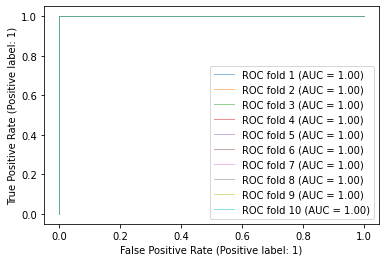

In [18]:
gene_list = []
val_auc_list = []
opt_c_list = []
opt_l1_ratios_list = []
max_auc_list = []
tpr_list = []
auc_list = []
mean_fpr = np.linspace(0, 1, 100)
idx = 1
fig, ax = plt.subplots() # using the variable ax for single a Axes

# let's use nested cross validation to model hyperparameter optimisation and model selection (no overfitting!)
for train_idx, val_idx in tqdm(train_val_sss.split(X_train, y_train)):
    train_data, val_data = X_train.iloc[train_idx], X_train.iloc[val_idx]
    train_target, val_target = y_train[train_idx], y_train[val_idx]
    
    # build a classifer (clf) using a logistic regression model with cross validation
    clf = LogisticRegressionCV(cv=5, scoring = "roc_auc", penalty="elasticnet", 
                               fit_intercept=True, solver="saga", Cs=10, 
                               n_jobs=3, max_iter=20000, random_state = 2,
                               class_weight='balanced',
                               l1_ratios = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1])

    # pass the training set to the `.fit` method for fitting (learning)
    clf.fit(train_data, train_target)
    
    # let's capture the top k feature based on the estimator model metrics (vs p-value)
    selector = SelectFromModel(clf, prefit = True, threshold = None)
    
    # let's identify the selected features `selector.get_support()` returns boolean
    # and use it to subset the training data
    train_data_genes = train_data.loc[:, selector.get_support()]
    
    # let's create a list of selected features, i.e. genes
    [gene_list.append(x) for x in train_data_genes.columns.values]
    #gene_list = [x for x in train_data_genes.columns.values]
    
    # let's store the list of coefficients `.coef_` in an array
    coefsArray =+ clf.coef_
    
    # let's get the probability of each outcome class of the validation data
    y_pred_prob = clf.predict_proba(val_data)[:,1]

    # let's compute ROC AUC from prediction scores
    val_auc_list.append(roc_auc_score(val_target, y_pred_prob))

    # let's store the list of optimal hyperparameters chosen by CV
    opt_c_list.append(clf.C_)
    # let's store the list of optimal L1/L2 ratio penalisation chosen by CV
    opt_l1_ratios_list.append(clf.l1_ratio_)
    # let's get the max score for all the folds
    max_auc_list.append(clf.scores_[1].mean(axis=0).max())

    # let's plot the ROC curve
    roc_plots = plot_roc_curve(clf, val_data, val_target,
                               name='ROC fold {}'.format(idx), alpha=0.5, lw=1, ax=ax)

    # let's do interpolation, of fpr (false positive rate) and tpr (ture positive rate)
    interp_tpr = np.interp(mean_fpr, roc_plots.fpr, roc_plots.tpr)
    interp_tpr[0] = 0.0
    tpr_list.append(interp_tpr)
    auc_list.append(roc_plots.roc_auc)
    idx = idx + 1
